In [1]:
#importing libraries

import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#reading the data

df=pd.read_csv(r'C:\Users\thoma\OneDrive\Desktop\pga08 0nline\winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.shape

(129971, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
#unnamed is not an important feature .so we can simply drop the feature at the beginning itselfs

df.drop('Unnamed: 0',axis=1 , inplace=True)

In [6]:
df.isnull().mean()

country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [7]:
#region_2 contain 61.13% null values. it will not make any effective sense in the analysis. so we can simply drop the column also

df.drop('region_2' , axis=1, inplace=True)

 ### EDA

In [8]:
data=df[['description', 'points']]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  129971 non-null  object
 1   points       129971 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [9]:
data=data.assign(description_len = data['description'].apply(len))
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   description      129971 non-null  object
 1   points           129971 non-null  int64 
 2   description_len  129971 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ MB


,description,points,description_len
0,"Aromas include tropical fruit, broom, brimston...",87,172
1,"This is ripe and fruity, a wine that is smooth...",87,227
2,"Tart and snappy, the flavors of lime flesh and...",87,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,199
4,"Much like the regular bottling from 2012, this...",87,249


In [10]:
def grouped_points(points):
    if points<84:
        return 0
    elif points>=84 and points <88:
        return 1
    elif points >=88 and points < 92:
        return 2
    elif points >=92 and points <96:
        return 3
    else:
        return 4

Group 1= Bad wine

Group 2=Average wine

Group 3=Good wine

Group 4=Extra ordinary wine

In [11]:
data = data.assign(points_group =data['points'].apply(grouped_points))

In [12]:
data.head()

,description,points,description_len,points_group
0,"Aromas include tropical fruit, broom, brimston...",87,172,1
1,"This is ripe and fruity, a wine that is smooth...",87,227,1
2,"Tart and snappy, the flavors of lime flesh and...",87,186,1
3,"Pineapple rind, lemon pith and orange blossom ...",87,199,1
4,"Much like the regular bottling from 2012, this...",87,249,1


<AxesSubplot:title={'center':'Number of wines per points'}, xlabel='points_group', ylabel='Number of wines '>

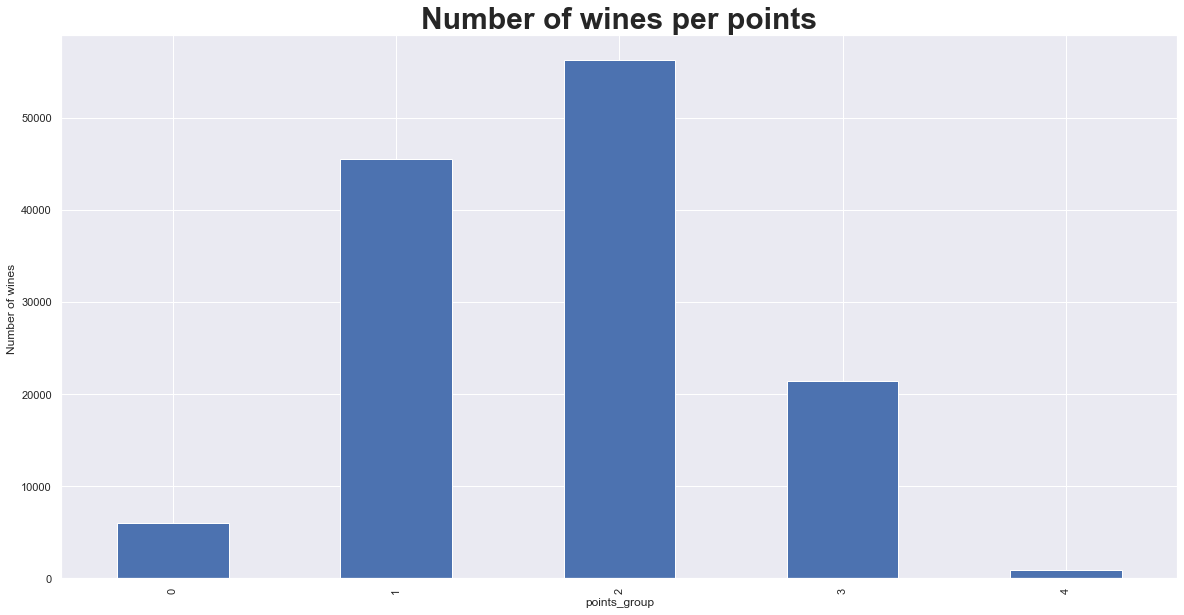

In [13]:
plt.figure(figsize=(20,10))
plt.ylabel('Number of wines ')
plt.title('Number of wines per points', fontweight='bold', size=30)
data.groupby(['points_group']).count()['description'].plot(kind='bar')

**Group** 2 has maximum number of wines, followed by **group 1** ,**group 3** and **group 0**

**Good wines** are most consumed one. **Bad wines** are very low when compared to other group also **extra ordinary** wine group is very very low

Text(0.5, 1.0, 'Description length per points group')

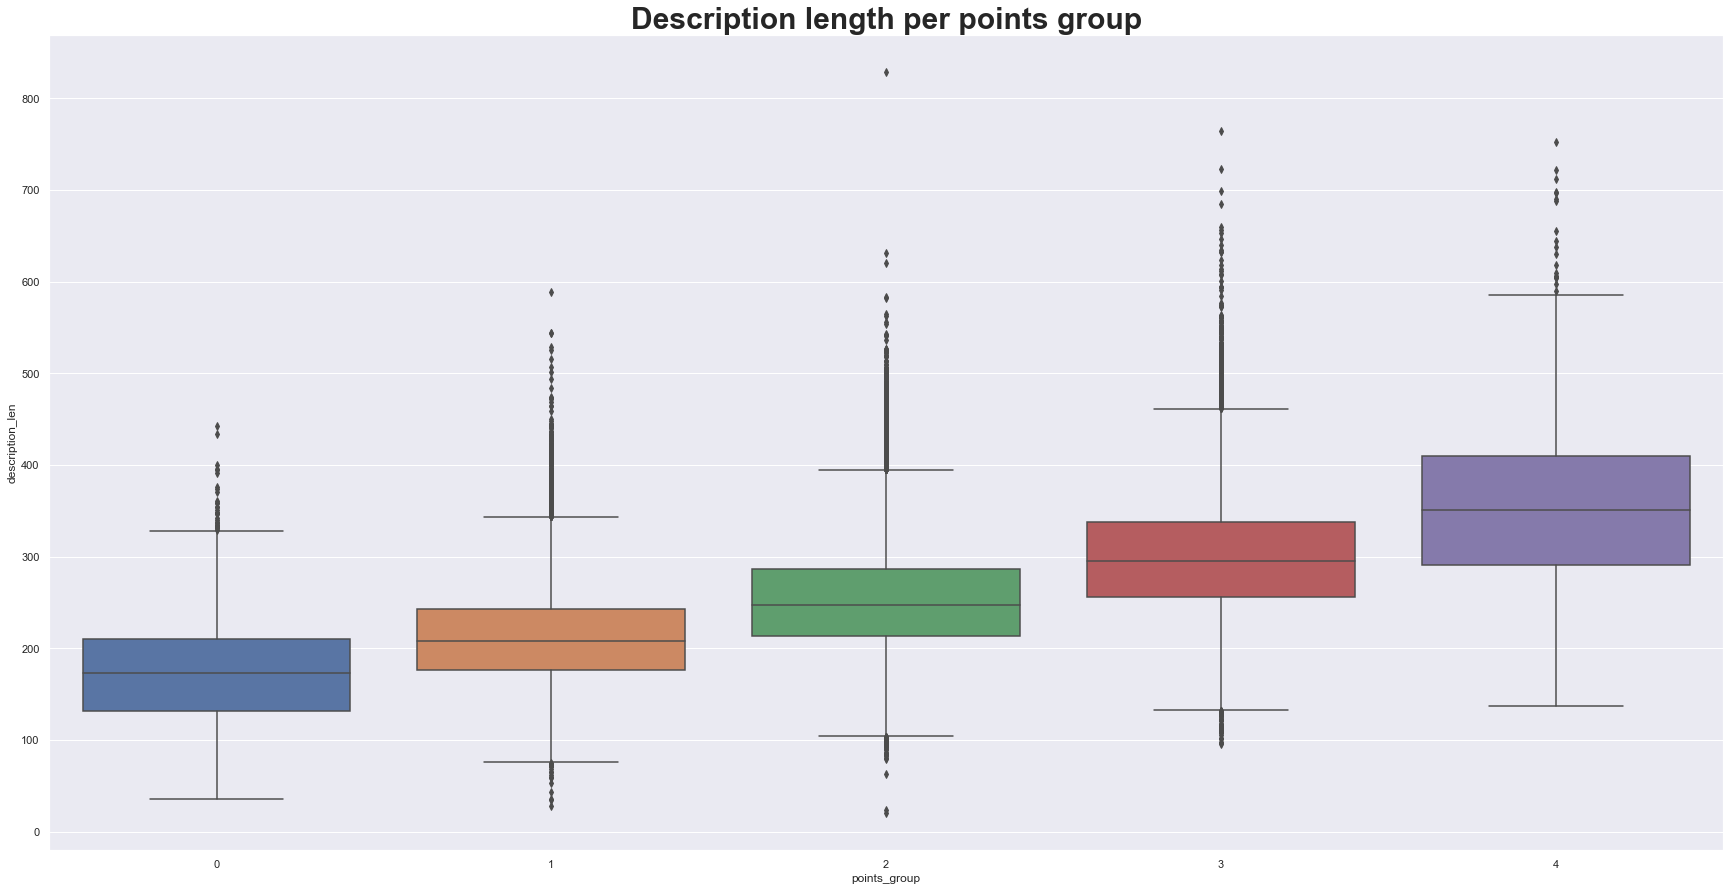

In [14]:
fig, ax=plt.subplots(figsize=(30,15))
sns.boxplot(x='points_group', y='description_len' , data = data)
ax.set_title('Description length per points group' , fontweight='bold', size=30)

### Feature engineering

In [16]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [20]:
df['taster_name'].nunique()

19

In [21]:
# searching for duplicated values

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Length: 129971, dtype: bool

In [22]:
# droping the duplicated values

df.drop_duplicates()


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [23]:
# searching for the null values

df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [24]:
df['price'].fillna(df['price'].median() , inplace=True)
df['country'].fillna(df['country'].mode()[0] , inplace=True)
df['region_1'].fillna(df['region_1'].mode()[0] , inplace=True)
df['designation'].fillna(df['designation'].mode()[0] , inplace=True)
df['province'].fillna(df['province'].mode()[0] , inplace=True)
df['variety'].fillna(df['variety'].mode()[0] , inplace=True)

In [25]:
df['taster_name'].fillna(df['taster_name'].mode()[0] , inplace=True)

In [26]:
# dropping feature taster twitter handle as it makes no sense to the target 
df.drop('taster_twitter_handle', axis=1, inplace= True)

In [27]:
df.drop(['taster_name','description'],axis=1 , inplace =True)

##### handling categorical values

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

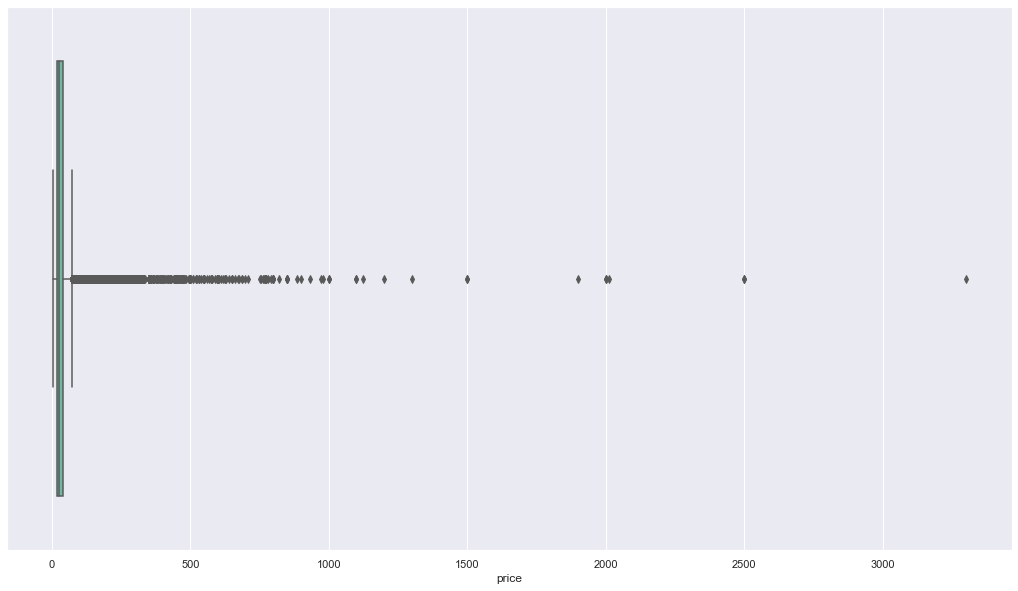

In [28]:
plt.figure(figsize=(18,10))
sns.boxplot(df['price'], palette = 'BuGn')

In [29]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.price>= Q1 - 3*IQR) & (df.price <= Q3 + 3*IQR)]

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

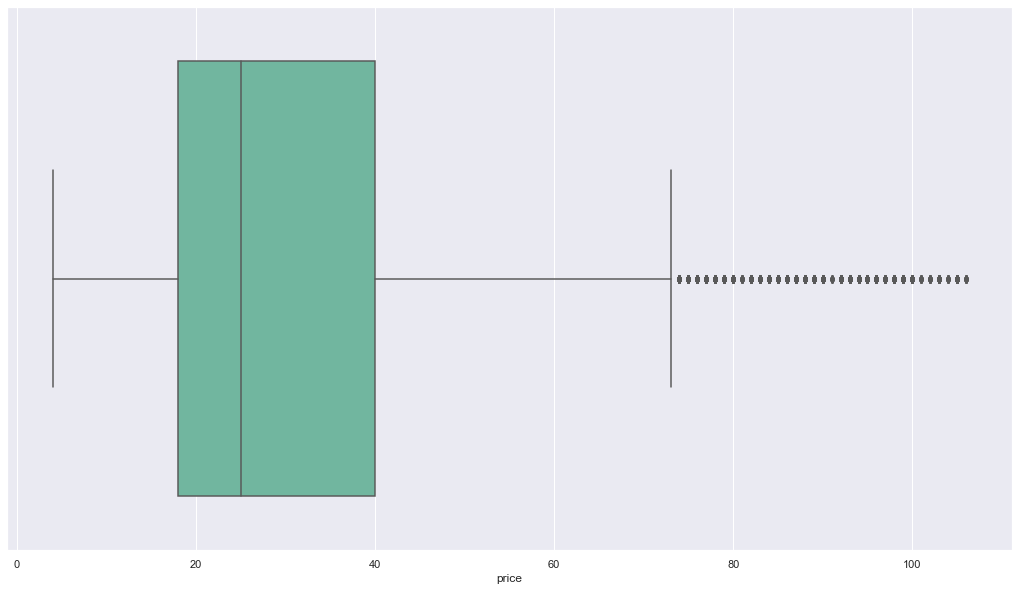

In [30]:
plt.figure(figsize=(18,10))
sns.boxplot(df['price'], palette = 'BuGn')

In [31]:
df.shape

(126831, 9)

######  handling catergorical data

In [34]:
cat_list= df.select_dtypes(include=object)
cat_list

,country,designation,province,region_1,title,variety,winery
0,Italy,Vulkà Bianco,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,Douro,Napa Valley,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,Reserve,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...
129966,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,Mosel,Napa Valley,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Reserve,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Kritt,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,Reserve,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in cat_list:
    df[i]= le.fit_transform(df[i])

C:\Users\thoma\AppData\Local\Temp\ipykernel_26728\411084850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= le.fit_transform(df[i])


In [36]:
df.head()

,country,designation,points,price,province,region_1,title,variety,winery
0,22,35847,87,25.0,331,416,77404,686,11531
1,31,2259,87,15.0,108,734,86975,449,12869
2,40,27097,87,14.0,268,1204,87387,435,12931
3,40,27195,87,13.0,218,541,98264,477,14295
4,40,35516,87,65.0,268,1204,100164,439,14526


#### splitting the data